In [88]:
from keras.datasets import mnist

In [89]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [90]:
train_data #60k samples, each sample 28 by 28

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [91]:
train_data[0]#28 by 28

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [92]:
len(train_data[0])

28

In [93]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

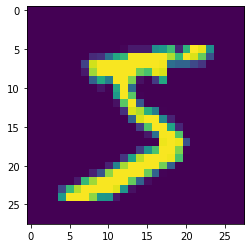

In [94]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
plt.show()

In [95]:
train_data.shape

(60000, 28, 28)

In [96]:
train_data[0].shape

(28, 28)

Data Reshaping 

In [97]:
train_data = train_data.reshape((60000, 28 * 28))
train_data = train_data.astype('float32') / 255
train_data[0].shape

(784,)

In [98]:
train_data.shape

(60000, 784)

In [99]:
train_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [100]:
test_data = test_data.reshape((10000, 28 * 28))
test_data =test_data.astype('float32') / 255

In [104]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [105]:
network.fit(train_data, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2566 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1047 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0693 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0494 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0376 - accuracy: 0.9888


In [81]:
metrics = network.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9781
